#Machine Learning Engineer Nanodegree
##Model Evaluation & Validation
##Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been written. You will need to implement additional functionality to successfully answer all of the questions for this project. Unless it is requested, do not modify any of the code that has already been included. In this template code, there are four sections which you must complete to successfully produce a prediction with your model. Each section where you will write code is preceded by a **STEP X** header with comments describing what must be done. Please read the instructions carefully!

In addition to implementing code, there will be questions that you must answer that relate to the project and your implementation. Each section where you will answer a question is preceded by a **QUESTION X** header. Be sure that you have carefully read each question and provide thorough answers in the text boxes that begin with "**Answer:**". Your project submission will be evaluated based on your answers to each of the questions.  

A description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Housing), which is provided by the **UCI Machine Learning Repository**.

#Getting Started
To familiarize yourself with an iPython Notebook, **try double clicking on this cell**. You will notice that the text changes so that all the formatting is removed. This allows you to make edits to the block of text you see here. This block of text (and mostly anything that's not code) is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options! Whether you're editing a Markdown text block or a code block (like the one below), you can use the keyboard shortcut **Shift + Enter** or **Shift + Return** to execute the code or text block. In this case, it will show the formatted text.

Let's start by setting up some code we will need to get the rest of the project up and running. Use the keyboard shortcut mentioned above on the following code block to execute it. Alternatively, depending on your iPython Notebook program, you can press the **Play** button in the hotbar. You'll know the code block executes successfully if the message *"Boston Housing dataset loaded successfully!"* is printed.

In [24]:
# Importing a few necessary libraries
import numpy as np
import matplotlib.pyplot as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor

# Make matplotlib show our plots inline (nicely formatted in the notebook)
%matplotlib inline

# Create our client's feature set for which we will be predicting a selling price
CLIENT_FEATURES = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]

# Load the Boston Housing dataset into the city_data variable
city_data = datasets.load_boston()

# Initialize the housing prices and housing features
housing_prices = city_data.target
housing_features = city_data.data

print "Boston Housing dataset loaded successfully!"

Boston Housing dataset loaded successfully!


#Statistical Analysis and Data Exploration
In this first section of the project, you will quickly investigate a few basic statistics about the dataset you are working with. In addition, you'll look at the client's feature set in `CLIENT_FEATURES` and see how this particular sample relates to the features of the dataset. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand your results.

##Step 1
In the code block below, use the imported `numpy` library to calculate the requested statistics. You will need to replace each `None` you find with the appropriate `numpy` coding for the proper statistic to be printed. Be sure to execute the code block each time to test if your implementation is working successfully. The print statements will show the statistics you calculate!

In [24]:
# Number of houses in the dataset
total_houses = housing_prices.size

# Number of features in the dataset
total_features = city_data.feature_names.size

# Minimum housing value in the dataset
minimum_price = np.amin(housing_prices)

# Maximum housing value in the dataset
maximum_price = np.amax(housing_prices)

# Mean house value of the dataset
mean_price = np.mean(housing_prices)

# Median house value of the dataset
median_price = np.median(housing_prices)

# Standard deviation of housing values of the dataset
std_dev = np.std(housing_prices)

# Show the calculated statistics
print "Boston Housing dataset statistics (in $1000's):\n"
print "Total number of houses:", total_houses
print "Total number of features:", total_features
print "Minimum house price:", minimum_price
print "Maximum house price:", maximum_price
print "Mean house price: {0:.3f}".format(mean_price)
print "Median house price:", median_price
print "Standard deviation of house price: {0:.3f}".format(std_dev)

Boston Housing dataset statistics (in $1000's):

Total number of houses: 506
Total number of features: 13
Minimum house price: 5.0
Maximum house price: 50.0
Mean house price: 22.533
Median house price: 21.2
Standard deviation of house price: 9.188


##Question 1
As a reminder, you can view a description of the Boston Housing dataset [here](https://archive.ics.uci.edu/ml/datasets/Housing), where you can find the different features under **Attribute Information**. The `MEDV` attribute relates to the values stored in our `housing_prices` variable, so we do not consider that a feature of the data.

*Of the features available for each data point, choose three that you feel are significant and give a brief description for each of what they measure.*

Remember, you can **double click the text box below** to add your answer!

**Answer: **

1. CRIM - It gives a measure of the crime rate per 100,000 people in that location. If the crime rate for a town is low, obviously the housing rate will go higer.

2. NOX- It gives the concentration og Nitric oxide in air for that location. This is an important factor in pricing as people will prefer the locations where air-pollution is comparitively low.

3. PTRATIO- This tells the number of pupils that are there per teacher in the town. People with kids will prefer the locations where more teachers are available so that the kids can get good educational facilities.



##Question 2
*Using your client's feature set `CLIENT_FEATURES`, which values correspond with the features you've chosen above?*  
**Hint: ** Run the code block below to see the client's data.

In [10]:
print CLIENT_FEATURES

[[11.95, 0.0, 18.1, 0, 0.659, 5.609, 90.0, 1.385, 24, 680.0, 20.2, 332.09, 12.13]]


**Answer: **

1. CRIM -    11.95
2. NOX -     0.659
3. PTRATIO - 20.2

#Evaluating Model Performance
In this second section of the project, you will begin to develop the tools necessary for a model to make a prediction. Being able to accurately evaluate each model's performance through the use of these tools helps to greatly reinforce the confidence in your predictions.

##Step 2
In the code block below, you will need to implement code so that the `shuffle_split_data` function does the following:
- Randomly shuffle the input data `X` and target labels (housing values) `y`.
- Split the data into training and testing subsets, holding 30% of the data for testing.

If you use any functions not already acessible from the imported libraries above, remember to include your import statement below as well!  
Ensure that you have executed the code block once you are done. You'll know if the `shuffle_split_data` function is working if the statement *"Successfully shuffled and split the data!"* is printed.

In [27]:
# Put any import statements you need for this code block here
from sklearn import datasets
from sklearn import cross_validation

def shuffle_split_data(X, y):
    """ Shuffles and splits data into 70% training and 30% testing subsets,
        then returns the training and testing subsets. """
    
    rs = cross_validation.ShuffleSplit(y.size, n_iter=3, test_size=.30,random_state=0)
    for train_index, test_index in rs:
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

    # Return the training and testing data subsets
    return X_train, y_train, X_test, y_test


# Test shuffle_split_data
try:
    X_train, y_train, X_test, y_test = shuffle_split_data(housing_features, housing_prices)
    print "Successfully shuffled and split the data!"
except:
    print "Something went wrong with shuffling and splitting the data."

Successfully shuffled and split the data!


##Question 4
*Why do we split the data into training and testing subsets for our model?*

**Answer: **
-> Using the training set, we train our data and choose the optimum parameters of a given model. Based on the input vector and output given, we determine the best parameters for the cost function.This is used to build up our prediction algorithm. Our algorithm tries to tune itself to the quirks of the training data sets. In this phase we usually create multiple algorithms in order to compare their performances during the Cross-Validation Phase.

-> Also, the testing set is pretty important because using this data,we can predict how good we our model or the function is. It gives us an unbiased estimate of the actual performance we will get at runtime. It might happen that our data is performing well for the input that it has already seen, but it can fail for the unseen value. Thats why keeping aside some input as a testing data is important. We can't use the training set for this, because the parameters are biased towards it.

##Step 3
In the code block below, you will need to implement code so that the `performance_metric` function does the following:
- Perform a total error calculation between the true values of the `y` labels `y_true` and the predicted values of the `y` labels `y_predict`.

You will need to first choose an appropriate performance metric for this problem. See [the sklearn metrics documentation](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) to view a list of available metric functions. **Hint: ** Look at the question below to see a list of the metrics that were covered in the supporting course for this project.

Once you have determined which metric you will use, remember to include the necessary import statement as well!  
Ensure that you have executed the code block once you are done. You'll know if the `performance_metric` function is working if the statement *"Successfully performed a metric calculation!"* is printed.

In [45]:
# Put any import statements you need for this code block here
from sklearn.metrics import mean_squared_error

def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """

    error = mean_squared_error(y_true, y_predict)
    return error


# Test performance_metric
try:
    total_error = performance_metric(y_train, y_train)
    print "Successfully performed a metric calculation!"
except:
    print "Something went wrong with performing a metric calculation."

Successfully performed a metric calculation!


##Question 4
*Which performance metric below did you find was most appropriate for predicting housing prices and analyzing the total error. Why?*
- *Accuracy*
- *Precision*
- *Recall*
- *F1 Score*
- *Mean Squared Error (MSE)*
- *Mean Absolute Error (MAE)*

**Answer: **  

I choose Mean Squared Error for analyzing the total error. The reasons behind it are  
-> The performance metric we choose really depends on what do we want to infer from the data. It also depends on how serious are we towards our false positives cases and outliers. In case of Boston datasets, i exactly  wanted an estimate of how far the predicted values lie from the original values and also i wanted the large errors and outliers to be emphasized. The MSE exacly does that. Firstly, it squares the difference between the true and predicted values so that the errors dont cancel out and it also focusses on the outliers. 

-> Accuracy is certainly not a good choice here because accuracy simply tells me that say x% predictions are correct and that too for a 100% match which will not help me in evaluating this model.Even if my predicted values differ by a very small amount for each X value, it will give me a 0% accuracy, which is very misleading here.  I actaully need the deviation by which my predicted values differ.

-> Precesion and recall both suffers from the same problem as Accuracy. Both of them focusses on the number of true positives that the model is able to detect. If the number of true positives is zero, both the precesion and recall will come out to be zero. Also, Accuracy,Precesion and Recall are part of Classification Metrics. They all just focus on the number of times the prediction is correct. As we are dealing with a regression problem here, its better to use MSE or MAE.

##Step 4 (Final Step)
In the code block below, you will need to implement code so that the `fit_model` function does the following:
- Create a scoring function using the same performance metric as in **Step 2**. See the [sklearn `make_scorer` documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Build a GridSearchCV object using `regressor`, `parameters`, and `scoring_function`. See the [sklearn documentation on GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html).

When building the scoring function and GridSearchCV object, *be sure that you read the parameters documentation thoroughly.* It is not always the case that a default parameter for a function is the appropriate setting for the problem you are working on.

Since you are using `sklearn` functions, remember to include the necessary import statements below as well!  
Ensure that you have executed the code block once you are done. You'll know if the `fit_model` function is working if the statement *"Successfully fit a model to the data!"* is printed.

In [29]:
# Put any import statements you need for this code block
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.grid_search import GridSearchCV
from sklearn import datasets

def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Set up the parameters we wish to tune
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # Make an appropriate scoring function
    scoring_function = make_scorer(mean_squared_error, greater_is_better=False)

    #print scoring_function

    # Make the GridSearchCV object
    reg = GridSearchCV(regressor, param_grid=parameters,scoring=scoring_function)

    # Fit the learner to the data to obtain the optimal model with tuned parameters
    reg.fit(X, y)

    # Return the optimal model
    return reg


# Test fit_model on entire dataset
try:
    city_data = datasets.load_boston()
    housing_prices = city_data.target
    housing_features = city_data.data
    reg = fit_model(housing_features, housing_prices)
    print "Successfully fit a model!"
except:
    print "Something went wrong with fitting a model."

Successfully fit a model!


##Question 5
*What is the grid search algorithm and when is it applicable?*

**Answer: **

The machine learning models are always parameterized and we have to find the best combination of parameters that will work for a model. The process of finding the best combination of parameters is a part of Algorihtm Tuning and Grid search algorihtm is one way to do it.  
Grid search is an approach to parameter tuning that methodically builds and evaluates a model for each combination of algorithm parameters specified in a grid. For example, the above code evaluates the `regressor` object for different values of `max-depth` supplied in the parameters. By default, the `GridSearchCV` uses a 3-fold cross-validation and it chooses the parameters to maximize the cross-validation score.  

Regarding its applicability,when the parameters of a model are not directly learnt within estimators,then it has to be found out by searching a parameter space for the best estimator performance score. `GridSearchCV` will use cross-validation to evaluate every possible combination of the parameters in order to choose between them and also minimizing or maximizing the `scoring_function`.


##Question 6
*What is cross-validation, and how is it performed on a model? Why would cross-validation be helpful when using grid search?*

**Answer: **

Apart from the testing and training set,the data is also split into a cross-validation set. Cross-validation data is often used to tune the parameters of a model. We decide the parameters during the training phase and we optimize it in the validation phase.  

Also,if we split our data into only training and testing(x%) sets, then on the training side, we have lost x% of the total data and on the testing side, we have lost (100-x)% of the data. To overcome this problem, we have K-Fold cros-validation rule.  

To perform K-Fold cross validation, the complete data set is divided into K equal bins. So for a data size of 200, we will have 10 bins of size 20 each. Now we will run K(10 here) separate learning experiments and in each experiment, we will take 1 bin as testing bin and the remaining K-1 bins as training bins. Then we average the test results from the K experiments to determine the parameters.

Grid search internally performs 3-fold cross validation, hence we can easily validate the optimized parameter model generated by it. Cross validation ensures that we have a sufficiently good model and that we don't over or underfit the data in any way. The grid search provided by GridSearchCV exhaustively generates candidates from a grid of parameter values specified with the `param_grid` parameter. When “fitting” it on a dataset all the possible combinations of parameter values are evaluated and the best combination is retained.

#Checkpoint!
You have now successfully completed your last code implementation section. Pat yourself on the back! All of your functions written above will be executed in the remaining sections below, and questions will be asked about various results for you to analyze. To prepare the **Analysis** and **Prediction** sections, you will need to intialize the two functions below. Remember, there's no need to implement any more code, so sit back and execute the code blocks! Some code comments are provided if you find yourself interested in the functionality.

In [40]:
import matplotlib.pyplot as pl

def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    print "Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . ."
    
    # Create the figure window
    fig = pl.figure(figsize=(10,8))

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.round(np.linspace(1, len(X_train), 50))
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        for i, s in enumerate(sizes):
            
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()

In [42]:
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print "Creating a model complexity graph. . . "

    # We will vary the max_depth of a decision tree model from 1 to 14
    max_depth = np.arange(1, 14)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    pl.plot(max_depth, train_err, lw=2, label = 'Training Error')
    pl.legend()
    pl.xlabel('Maximum Depth')
    pl.ylabel('Total Error')
    pl.show()

#Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing error rates on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `max_depth` parameter on the full training set to observe how model complexity affects learning and testing errors. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

/Users/rahul.raja/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:26: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/rahul.raja/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:29: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/rahul.raja/miniconda2/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .


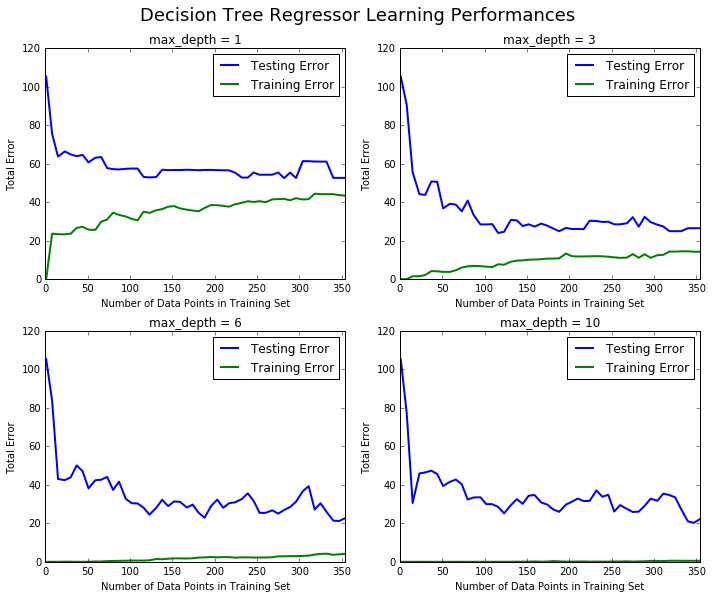

In [33]:
learning_curves(X_train, y_train, X_test, y_test)

##Question 7
*Choose one of the learning curve graphs that are created above. What is the max depth for the chosen model? As the size of the training set increases, what happens to the training error? What happens to the testing error?*

**Answer: **

I chose the model with `max-depth` of 10.In that graph, the training error is almost zero and it increases very slightly as the size of the data increases. The testing error decreases rapidly first initially and it continues to decrease with some local maxima occuring frequantly on the way.

##Question 8
*Look at the learning curve graphs for the model with a max depth of 1 and a max depth of 10. When the model is using the full training set, does it suffer from high bias or high variance when the max depth is 1? What about when the max depth is 10?*

**Answer: **

-> In case of `max-depth` of 1, when the model is full  trained, it suffers from high bias. The model is clearly underfitting and in other words it has not been able to learn properly from the data. This is because both the training and testing errors flatten out afer some initial spike and they don't show any change after certain time. They become almost constant towards the end of complete data train. This means that they have not been able to capture the trend of the underlying data and the algorithm does not fit the data well enough.

-> In case of `max-depth` of 10, when the full training set has been used, the model overfits the data and it suffers from high variance problem. This is because the training error almost remains zero after the model has been fully trained and the testing error shows some high variations. It means the training data has fit the model too well and the model has also captured the noise of the data.

Creating a model complexity graph. . . 


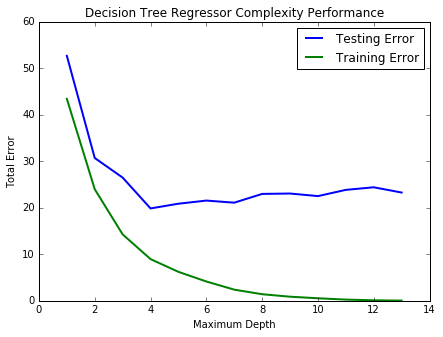

In [38]:
model_complexity(X_train, y_train, X_test, y_test)

##Question 9
*From the model complexity graph above, describe the training and testing errors as the max depth increases. Based on your interpretation of the graph, which max depth results in a model that best generalizes the dataset? Why?*

**Answer: **
Based on the above graph, initally both the training and testing errors show a decline when the maximum depth increases. But after a point, the training error becomes almost zero and the testing error becomes constant, which is clearly a sign of overfitting. Means the model is becoming very familiar with the data after a certain point, and hence it gives an almost zero training error.

From the graph, it looks like that after `max-depth` of 4, the signs of overfitting start to appear. Before `max-depth` of 4, the model shows high training and testing error which means it has not learned enough before `max-depth` 4. So we can consider `max-depth` of 4 as the parameter which generalizes the model and where the training and testing errors are optimum.

#Model Prediction
In this final section of the project, you will make a prediction on the client's feature set using an optimized model from `fit_model`. *To answer the following questions, it is recommended that you run the code blocks several times and use the median or mean value of the results.*

##Question 10
*Using grid search on the entire dataset, what is the optimal `max_depth` parameter for your model? How does this result compare to your intial intuition?*  
**Hint: ** Run the code block below to see the max depth produced by your optimized model.

In [34]:
print "Final model optimal parameters:", reg.best_params_

Final model optimal parameters: {'max_depth': 6}


**Answer: **

The above code produces the optimal `max-depth` of 6. However, after running the code 60 times in a loop, and taking the mean of all the `max-depth` values, the result comes out to be 5. I get the same result when i take the median of these values as well.

The result is almost equal to my initial intuition value i.e according to the model, `max-depth` of 5 is the sweet spot at which both the training and testing errors are optimal. Above 5, the model starts suffering from overfitting and below 5, it suffers from underfitting.

##Question 11
*With your parameter-tuned model, what is the best selling price for your client's home? How does this selling price compare to the basic statistics you calculated on the dataset?*  

**Hint: ** Run the code block below to have your parameter-tuned model make a prediction on the client's home.

In [44]:
sale_price = reg.predict(CLIENT_FEATURES)
print "Predicted value of client's home: {0:.3f}".format(sale_price[0])

Predicted value of client's home: 20.766


**Answer: **
After running this model for 60 times over the specified data,the median house pricing comes out to be 21.629 while the mean value of pricing comes out to be 20.538.  
The actual mean of all the `housing_prices` comes out to be 22.532 while its median comes out to be 21.2. So we can see here that the mean pricing differs only by 1.994 while the median pricing differs by 0.529. Thats not too much of a difference(not even 1 standard deviation difference) when we see the housing data.So the model performs fairly well on the calculation.  

We could have investigated more if the prediction would have come as an outlier, but since it fits among the other central tendency measures of the data, it can be considered reliable.

##Question 12 (Final Question):
*In a few sentences, discuss whether you would use this model or not to predict the selling price of future clients' homes in the Greater Boston area.*

**Answer: **

I beleive this model is fairly capable to predict the selling price of future clients.

-> To verify the accuracy of the model, i first split the data into 70% train data and 30% test data using the function `shuffle_split_data()` above. Then i trained the model using only `X_train` and `y_train` and the function `fit_model` which uses a `DecisionTreeRegressor` and `GridSearchCV` to tune its parameters. Then i used the `X_test` values to predict the `y_test_predicted` values using the function `reg.predict(X_test)` ,where `reg` is a `GridSearchCV` object. On plotting the `y_test` and `y_test_predicted` values, i got the following graph.  
![](http://i.imgur.com/bC9VcLL.png)

As we can see from the graph, specially in the region 10-20, the predicted values are close to the original values. While in the range 40-50 also, it has estimated fairly well.

-> Also, the `mean_absolute_error` and `mean_absolute_error` of `y_test` and `y_test_predicted` comes out to be 21.80 and 2.87 which is quite reasonable for this type of data. 
